In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'


# Wczytaj zbiór MNIST i znormalizuj dane (jak na poprzednich zajęciach)
# Stwórz dwa modele. Każdy z nich powinien mieć jedną warstwę ukrytą o 256 neuronach. 
# Różnica polega na dołączeniu w jednym z nich warstwy Dropout zaraz po 
# warstwie ukrytej - Dropout(0.2).
# Wytrenuj oba modele
# Stórz wykresy porównujące val_acc i acc obu modeli

c:\Users\Lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
import numpy as np
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [8]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28, 28)))
model1.add(Dense(256, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
#es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)
EPOCHS = 100

In [25]:
history1 = model1.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)
history2 = model2.fit(x_train, y_train, epochs=EPOCHS, validation_split=0.2)

Epoch 1/100


1500/1500 [==============================] - 7s 5ms/step - loss: 0.0057 - accuracy: 0.9982 - val_loss: 0.1163 - val_accuracy: 0.9787
Epoch 2/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0041 - accuracy: 0.9986 - val_loss: 0.1197 - val_accuracy: 0.9776
Epoch 3/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 0.1101 - val_accuracy: 0.9786
Epoch 4/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1244 - val_accuracy: 0.9786
Epoch 5/100
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0052 - accuracy: 0.9983 - val_loss: 0.1373 - val_accuracy: 0.9758
Epoch 6/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1221 - val_accuracy: 0.9788
Epoch 7/100
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0058 - accuracy: 0.9982 - val_loss: 0.1214 - val_accuracy: 0.97

KeyboardInterrupt: 

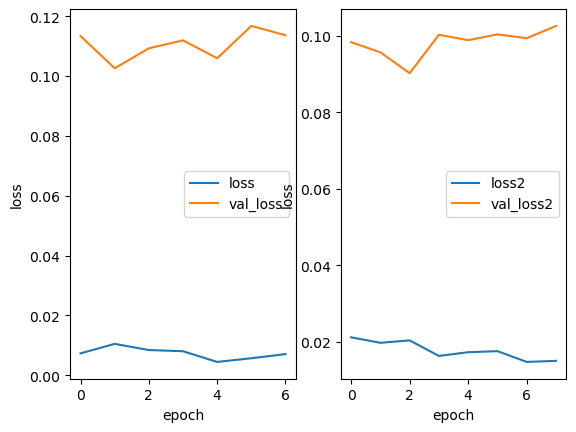

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(loss, label = "loss")
plt.plot(val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(loss2, label = "loss2")
plt.plot(val_loss2, label = "val_loss2")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()
plt.tight_layout()

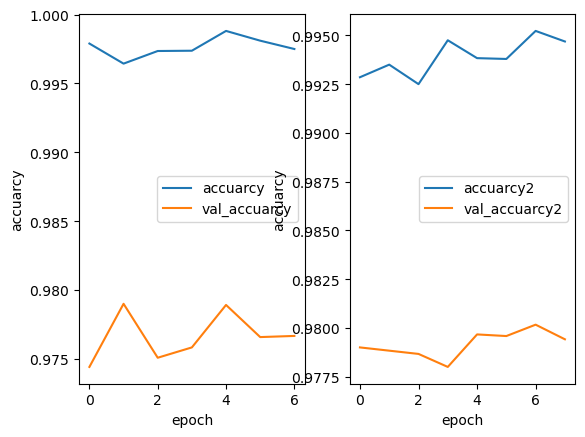

<Figure size 640x480 with 0 Axes>

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']
plt.subplot(1,2,1)
plt.plot(acc, label = "accuarcy")
plt.plot(val_acc, label = "val_accuarcy")
plt.xlabel("epoch")
plt.ylabel("accuarcy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(acc2, label = "accuarcy2")
plt.plot(val_acc2, label = "val_accuarcy2")
plt.xlabel("epoch")
plt.ylabel("accuarcy")
plt.legend()


plt.show()
plt.tight_layout()

